# Lecture 6: Visualizing maps, graphs, time series

[Data Visualization · 1-DAV-105](http://bbrejova.github.io/viz/)

Lecture by Broňa Brejová

## Package installation

We need to install several packages whoich are not prinstalled in Colab.

In [65]:
! pip install cartopy geopandas geoplot pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
# importing our usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown


# new libraries for today:
#  geopandas is a library for working with geographical data
import geopandas as gpd
#  geoplot is a library for visualizing geographical data
import geoplot as gplt
#  we also will use a submodule of plotly
import plotly.graph_objects as go
#  networkx is a library for working with graphs and networks
import networkx as nx
# Pyvis is a library for drawing networks
from pyvis.network import Network

## Maps

### Introduction 

* Each map is a visualization of data about location of objects
* Rich set of conventions about colors and symbols, orientation etc. allows to quickly understand a map

Examples:
* [A topographic map from US](https://en.wikipedia.org/wiki/Map#/media/File:Topographic_map_example.png) looks similar to maps used in Slovakia, but striped lines are typically used for railroads in Slovakia ([example](https://mapy.dennikn.sk/?zoom=13&lat=6147168.60859&lon=1891015.76613&layers=00B00FFFTTFTTTTFFFFFFFTTT)).
* [A map of European countries from 1721](https://en.wikipedia.org/wiki/Europe#/media/File:Herman_Moll_A_New_Map_of_Europe_According_to_the_Newest_Observations_1721.JPG) can also be easily read by today's audience.

Data visualization in maps

* Maps visualizing data other than typical geographical features are usually called thematic maps (tematické mapy)
* We will see several examples, for others see e.g. [Wikipedia](https://en.wikipedia.org/wiki/Thematic_map), [GeoPlot library gallery](https://residentmario.github.io/geoplot/gallery/index.html)
* Also recall the [Snow's map of cholera cases](https://commons.wikimedia.org/wiki/File:Snow-cholera-map-1.jpg) from the first lecture.

### Map projection (kartografické zobrazenie)

* A map projection is a tranformation to project surface of a globe onto a plane.
* Each projection introduces **some distortion**.

**Conformal projections** preserve local angles, but distort other aspects, such as lengths, areas etc., 
* For example, Mercator projection (1569) was developed for navigation, but shows Greenland bigger than Africa, while in fact it is 14x smaller.

**Equal-area projection** preserves areas (cannot be conformal at the same time).
* Equal-area projections are typically good for data visualization, as they make areas comparable.

**Orthographic projection** is similar to a photograph of the Earth from a very distant point.
* It is not an equal-area projection, but our sense of perspective may compensate.
* Displays one hemisphere.

Recommended projections (Cairo, The Truthful Art):

* Whole world: e.g. Mollweide equal-area projection (1805)
* Continents / large countries: e.g. Lambert azimuthal equal-area projection (1772)
* Countries in mid-latitudes: e.g. Albers equal-area conic projection (1805)
* Polar regions: e.g. Lambert azimuthal equal-area projection (1772)

#### Examples of projections in Plotly

* Plotly allows us to set projections for our plot. Here we use it to illustrate the [projections](https://plotly.com/python/map-configuration/#map-projections) on the map of continent outlines.
* The maps are interactive.


In [67]:
def show_world(projection, scope=None):
  """A function to display the whole Earth or a desired 
  area (scope) using a selected projections. Both arguments 
  are strings that name projectsions or scopes supported by Plotly."""
  # crete a map figure with an empty scatterplot
  fig = go.Figure(go.Scattergeo())
  # set the desired projection
  fig.update_geos(projection_type=projection)
  # we can also limit the scope of the map
  if scope is not None:
    fig.update_geos(scope=scope)
  # finally, make the image smaller and with 0 margins
  fig.update_layout(height=200, margin={"r":0,"t":0,"l":0,"b":0})
  # show the figure
  fig.show()


In [68]:
display(Markdown("**Orthographic projection**"))
show_world("orthographic")

**Orthographic projection**

In [69]:
display(Markdown("**Mollweide equal-area projection**"))
show_world("mollweide")

**Mollweide equal-area projection**

In [70]:
display(Markdown("**Mercator conformal projection** (not recommended for data visualization)"))
show_world("mercator")

**Mercator conformal projection** (not recommended for data visualization)

In [71]:
display(Markdown("**Lambert azimuthal equal-area projection**"))
show_world("azimuthal equal area", "europe")

**Lambert azimuthal equal-area projection**

### Adding data as points and lines to a map

* Geographic coordinates of places can be projected as x and y. Additional values can be shown using marker color and size or line color and width.
* We illustrate this using datasets of airport locations and airline connections, including the number of seats within a year.
* The dataset of international airport of the world was [downloaded](https://datacatalog.worldbank.org/search/dataset/0038117/Global-Airports) from the World Bank under the CC-BY 4.0 license, and preprocessed. The number of seats is from unknown years, possibly not comparable between countries.

#### Technical details

* Our preprocessed file is in Geojson format used for describing simple geographical features. It contains both location data and other attributes. 
* We parse the file using [GeoPandas](https://geopandas.org/), which is a library for working with geographical data.
* It is an extension of Pandas DataFrame, with location information.
* Each row of the table contains one airport, with its 3-letter code, name, country, 3-letter code of the country, the number of airplane seats per year and the location.

In [72]:
display(Markdown("**Importing the list of airports**"))
# parse the file
airports = gpd.read_file("https://bbrejova.github.io/viz/data/airports.geojson")
# show the first 5 rows
display(Markdown("**The first five rows:**"), airports.head())
# show the toal number of rows
display(Markdown(f"**The number of rows:** {airports.shape[0]}"))
display(Markdown("**International airports in Slovakia**"))
display(airports.query('Country == "Slovakia"'))

**Importing the list of airports**

**The first five rows:**

,Orig,Name,TotalSeats,Country,ISO3,geometry
0,HEA,Herat,22041.971,Afghanistan,AFG,POINT (62.22670 34.20690)
1,JAA,Jalalabad,6343.512,Afghanistan,AFG,POINT (70.50000 34.40000)
2,KBL,Kabul International,1016196.825,Afghanistan,AFG,POINT (69.21390 34.56390)
3,KDH,Kandahar International,39924.262,Afghanistan,AFG,POINT (65.84750 31.50690)
4,MZR,Mazar-e-Sharif,58326.513,Afghanistan,AFG,POINT (67.20830 36.70420)


**The number of rows:** 2173

**International airports in Slovakia**

,Orig,Name,TotalSeats,Country,ISO3,geometry
1489,BTS,M.R. Stefanik,1211732.116,Slovakia,SVK,POINT (17.21670 48.16670)
1490,ILZ,Zilina,3986.360,Slovakia,SVK,POINT (18.76670 49.23330)
1491,KSC,Barca,323259.132,Slovakia,SVK,POINT (21.25000 48.66670)
1492,PZY,Piestany Airport,1403.892,Slovakia,SVK,POINT (17.83330 48.63330)
1493,SLD,Sliac,11876.753,Slovakia,SVK,POINT (19.13330 48.63330)
1494,TAT,Tatry/Poprad,39612.286,Slovakia,SVK,POINT (20.24030 49.07190)


#### All airports as points using Plotly

* We use [`scatter_geo`](https://plotly.com/python/bubble-maps/) function from Plotly Express.
* We set parts of `geometry` column as latidue and longitude. Column `Name` is used as a tooltip.

In [73]:
fig = px.scatter_geo(
    airports, 
    lat=airports.geometry.y,
    lon=airports.geometry.x,
    hover_name="Name",
    projection="mollweide"
    )
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Adding size of the airport

* We focus on Europe, add country borders and change the projection.
* Scatterplots with point sizes are often called bubble graphs.

In [74]:
fig = px.scatter_geo(
    airports, 
    lat=airports.geometry.y,
    lon=airports.geometry.x,
    size="TotalSeats",
    hover_name="Name"
    )
fig.update_geos(
    projection_type="azimuthal equal area",
    lonaxis_range= [-20, 40],
    lataxis_range= [20, 70],
    showcountries = True  
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Airline connections from Slovakia as lines
* We import another table (originating from World bank as above), which shows international airline connections from Slovak airports (in an unknown year).
* Each connection is given by two airport codes, the number of airplane seats within a year, and geometry with a segment connecting the two airport locations.
* Line color will correspond to the airport of origin in Slovakia.

* The code is adapted from [examples](https://plotly.com/python/lines-on-maps/) in the Plotly [documentation](https://plotly.com/python-api-reference/generated/plotly.express.line_geo.html).


In [75]:
display(Markdown("**Importing airline connections**"))
connections = gpd.read_file("https://bbrejova.github.io/viz/data/airport_pairs_svk.geojson")
display(connections.head())

**Importing airline connections**

,OrigCode,DestCode,TotalSeats,geometry
0,BTS,ADB,7370.433,"LINESTRING (17.21670 48.16670, 27.15620 38.29430)"
1,BTS,AGP,15152.501,"LINESTRING (17.21670 48.16670, -4.49810 36.67170)"
2,BTS,AHO,14740.866,"LINESTRING (17.21670 48.16670, 8.28890 40.63060)"
3,BTS,AQJ,3275.748,"LINESTRING (17.21670 48.16670, 35.01940 29.61250)"
4,BTS,ATH,19654.488,"LINESTRING (17.21670 48.16670, 23.94440 37.93640)"


In [76]:
def draw_lines(connections):
  # create two lists with x and y coordinates of polylines
  # separated by None 
  lats = []
  lons = []
  # also create lists of origin and destination codes parallel to lists above
  origCodes = []
  destCodes = []
  
  # iterate through table rows
  for index, row in connections.iterrows():    
    # get lists of x and y coordinates (of length 2 in this case)
    x, y = row['geometry'].xy
    # add coordinates and None seperator to lists
    lats.extend(list(y) + [None])
    lons.extend(list(x) + [None])
    # add airport codes for each coordinate and None separator
    origCodes.extend([row['OrigCode']] * len(x) + [None])
    destCodes.extend([row['DestCode']] * len(x) + [None])    

  # create figure with these lists
  fig = px.line_geo(lat=lats, lon=lons, hover_name=destCodes, color=origCodes)
  # setup projection
  fig.update_geos(
    projection_type="azimuthal equal area",
    lonaxis_range= [-25, 55],
    lataxis_range= [10, 60],
    showcountries = True  
  )
  fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()

# call the function to draw the map
display(Markdown("**Airline connections from Slovak airports**"))
draw_lines(connections)

**Airline connections from Slovak airports**

### Isarithmic maps / isoline maps / heatmaps

* Display continuous variable over map area (elevation, temperature and other weather phenomena etc.).
* Value in each point can be shown by a color scale.
* Also some contour lines can be displayed.
* A contour line (isoline, isopleth, isarithm, izočiara) connects points the same value.
* Example: [short-term forecasts](https://www.shmu.sk/sk/?page=1&id=meteo_inca_base) from the Slovak Hydrometeorological Institute.

#### Density of airports
* Here we show world airports as both points and their local density as a isarithmic map
* This is achieved using [`kdeplot`](https://residentmario.github.io/geoplot/plot_references/plot_reference.html#kdeplot) function from the Geoplot library.
* KDE stands for kernel density estimation, and we will explain it in the next lecture.

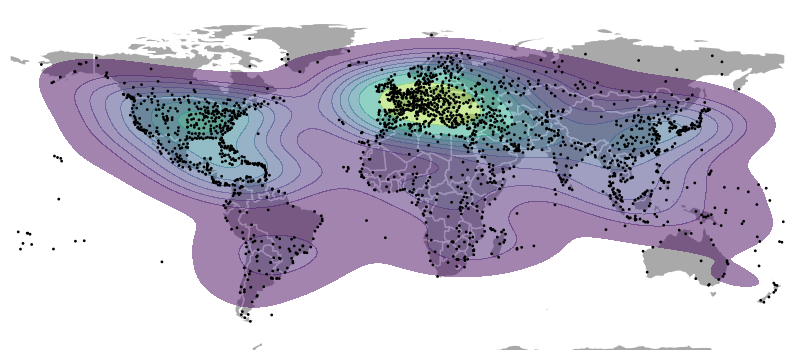

In [77]:
# read world countries as a dataset provided in in Geoplot library
world = gpd.read_file(gplt.datasets.get_path('world')).explode(index_parts=True)
# plot countries as a background
ax = gplt.polyplot(
    world,
    edgecolor='white',
    facecolor='darkgray',
    figsize=(10, 5), 
)
# plot semi-transparent isarithmic map
gplt.kdeplot(
    airports, cmap='viridis',
    fill=True, ax=ax, alpha=0.5
)
# plot points on top
gplt.pointplot(airports, s=1, color='black', ax=ax)
pass

### Choropleth maps (kartogram)

* Often we have numerical / categorical values for administrative regions (countries, districts, etc.)
* Choropleth maps show such variables via colors applied to the whole region

Variables over regions:
* **Spatially extensive** variables apply to the unit as a whole (e.g. total population, area, the number of airports in the country. If we subdivide the region, spatially extensive variable will be often the sum of its parts (but not always, e.g. perimeter)
* **Spatially intensive** variables may stay the same of you divide the unit, provided the unit is homogeneuos without regional differences. Examples include population density, life expectation, GDP per person.
* Spatially extensive variables are not appropriate for choropleths, because large value for a large country is visually attributed to each small subregion of the country. If counts are of interest, better use a bubble graph with marker of appropriate size in the region center.


Beware: 
* A choropleth map is called kartogram in Slovak. 
* English word **cartogram** means a map with regions rescaled according to some variable (such as the [Levasseur's cartogram of country budgets](https://bbrejova.github.io/viz/pdf/L01a_visualization_history.pdf) and [a modern example](https://worldmapper.org/maps/catholic-population-2005/)).

#### Choropleth maps of airports per country
We will show three maps:
* the number of airports per 10000 km$^2$ (spatially intensive variable),
* the number of pairports per million inhabitants (also spatially intensive),
* the number of airports (spatially extensive, not recommended for choropleth),
* We will also show the number of airports as a bubble graph (more appropriate).

All choropleth maps are created by [Plotly](https://plotly.com/python/choropleth-maps/). The bubble graph is also created by plotly, and the bubble is placed to the [representative point](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.representative_point.html) of each country.

In [78]:
# import dataset of countries supplied with geopandas
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# set 3-letter code as as the index
countries = countries.rename(columns={'iso_a3':'ISO3'}).set_index('ISO3')
# estimate country area in square km from geometry
# first the geometry is projected by equal-area projection
# the result is in square meters, converted to squared km (divide by 1e6)
# beware that areas are approximate due to low resolution borders
country_areas = countries['geometry'].to_crs({'proj':'cea'}).area  / 1e6
# add areas to countries 
countries['area'] = country_areas

display(Markdown("**Table of countries of the world**"))
display(countries.head())

**Table of countries of the world**

,pop_est,continent,name,gdp_md_est,geometry,area
ISO3,,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.928760e+04
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",9.327793e+05
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",9.666925e+04
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.003773e+07
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",9.509851e+06


In [79]:
# compute the number of airports per country by groupby
airports_per_country = airports.groupby('ISO3').size()
# add the new column to a copy of the old table
countries2 = countries.copy(deep=True)
# add the number of airports as a new column
countries2['airports'] = airports_per_country
# remove columns where airports or location are missing
countries2.dropna(subset=['geometry', 'airports'], inplace=True)
# add columns with airport density and airports per million people
countries2['airport_density'] = (countries2['airports'] 
                                 / countries2['area'] * 10000)
countries2['airports_per_mil'] = (countries2['airports'] 
                                 / countries2['pop_est'] * 1e6)
# show the new table
display(Markdown("**The first five rows of `countries2` table:**"))
display(countries2.head())
display(Markdown("**The values for Slovakia:**"))
display(countries2.loc['SVK'])

**The first five rows of `countries2` table:**

,pop_est,continent,name,gdp_md_est,geometry,area,airports,airport_density,airports_per_mil
ISO3,,,,,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.928760e+04,2.0,1.036935,2.247310
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",9.327793e+05,7.0,0.075045,0.120678
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",9.666925e+04,2.0,0.206891,3.315359
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.003773e+07,82.0,0.081692,2.181474
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",9.509851e+06,291.0,0.305998,0.886548


**The values for Slovakia:**

pop_est                                                     5454073.0
continent                                                      Europe
name                                                         Slovakia
gdp_md_est                                                     105079
geometry            POLYGON ((22.558137648211755 49.08573802346714...
area                                                     47069.779734
airports                                                          6.0
airport_density                                              1.274703
airports_per_mil                                             1.100095
Name: SVK, dtype: object

In [80]:
def draw_choropleth(data, column, range_color=None, label=None):
  fig = px.choropleth(
    data, locations=data.index, color=column,
    range_color=range_color,
    labels={column:label},
    hover_name="name",
    projection = "mollweide"
  )
  fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()

display(Markdown("**The number of airports per 10000 squared km**"))
draw_choropleth(countries2, 'airport_density', (0, 2), 'airports / 10000 km2')

**The number of airports per 10000 squared km**

In [81]:
display(Markdown("**The number of airports per million inhabitans**"))
draw_choropleth(countries2, 'airports_per_mil', (0, 5), 'airports / million people')

**The number of airports per million inhabitans**

In [82]:
display(Markdown("**The number of airports in a country**"))
draw_choropleth(countries2, 'airports', (0, 100), 'airports')

**The number of airports in a country**

In [83]:
# make a new table of countries in which gemoetry is replaced 
# with a single representative point
countries3 = countries2.copy(deep=True)
countries3['geometry'] = countries2['geometry'].representative_point()

# plot as a bubble plot
display(Markdown("**The number of airports in a country**"))
fig = px.scatter_geo(
    countries3, 
    lat=countries3.geometry.y,
    lon=countries3.geometry.x,
    size="airports",
    hover_name="name",
    projection = "mollweide"
    )
fig.update_geos(showcountries = True)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**The number of airports in a country**

## Graphs and hierarchies

### Graphs
* A **graph / network** consists of **vertices** (vrcholy; also nodes, uzly) and **edges** (hrany; also links, arcs).
* Vertices often represent real-world **entities** (places, people, companies, texts, tasks, university courses, ...).
* Edges often represent **relationships** and connections between pairs of vertices (roads, network cables, family or work relationships, financial transactions, text references, course or task prerequisites).
* Edges can be directed (orientované) or undirected depending on whether the relationship is symmetrical.
* Graphs are very important in both computer science and data science, they arise in many practical situations.
* Graphs are covered in several courses: discrete mathematics, programming, design of efficient algorithms, network science.
* Recall: how did you define directed / undirected edges in discrete mathematics?


### Trees and hierarchies

* Undirected graph is called a tree if it is connected and without cycles.
* In practice we usually encounter rooted (directed) trees, which have a single **root**, all other vertices can be reached from the root via a unique path.
* This gives rise to parent / child relationships between nodes (parent is the node closer to the root).
* Trees can express hierarchies in which each entity has a single direct superior, for example:
  * company structure in which each employee (except for the head of the company) has a single supervisor (similarly army command),
  * administrative divisions (country, region, district),
  * species taxonomy (animals, mammals, primates, ...).
* However some hierarchies allow multiple direct superiors, for example:
  * family tree where each person has two parents (and they may be distantly related),
  * geometrical shapes, where a square is both a special case of a regular polygon and a special case of a rectangle and both of these are a special case of a polygon. 
* These hierarchies can be represented as directed acyclic graphs.
  * Acyclic means that by following edges we never get back to the starting node (nobody is their own ancestor).

### What do we study / visualize in real-life graphs?

* Details of connections for a particular node (requires zooming in large networks).
* Overall structure of the graph: connected components, density of edges, presence of cycles, weak places (bridges and articulations), clusters of densely connected nodes.
* Do nodes with some property cluster together? (Are they connected by many edges?)

See for example character co-occurence in [Shakespeare's tragedies](http://www.martingrandjean.ch/network-visualization-shakespeare/).

### Basics of graph drawing

* Vertices are typically displayed as markers (circles, rectanges etc.), possibly with labels, size, color, ...
* Edges are displayed as lines connecting them, possibly of different color or width. They can be straight lines, arcs, polygonal lines or arbitrary curves.
* Edge direction displayed as arrows or in a hierarchy edges may be drawn to point in one direction, e.g. downwards.

Desirable properties:
* Nodes do not overlap.
* Edges are not too long and have a simple shape without many bends.
* The number of edge crossings is small.
* The graph uses the space of the figure well without large empty regions.

Node positioning:
* Sometimes the position of nodes is given by their properties, e.g. on a map (see airline connections), level of a hierarchy, timeline.
* Otherwise we try to place nodes to optimize desirable properties, e.g. using force-directed layout, which assigns attractive forces (springs) between nodes connected by edges and repulsive forces between other pairs of nodes.

Examples: 
* https://en.wikipedia.org/wiki/Graphviz#/media/File:UnitedStatesGraphViz.svg
* https://upload.wikimedia.org/wikipedia/commons/9/90/Visualization_of_wiki_structure_using_prefuse_visualization_package.png

### Displaying a simple hierarchy in Pyvis

* [Pyvis](https://pyvis.readthedocs.io/en/latest/) is a library for interactive visualization of graphs (networks) and trees (hierarchies)
* We will use its class `Network` to represent the network and draw it.
* We create a simple tree representing taxonomy of selected even-toed ungulates (párnokopytníky) as a Pandas `DataFrame`.
* Each row of the data frame describes each node, giving its name, parent, level along the tree (leaves are 1, root is 5) and category, which is `land` for land animals, `sea` for sea animals and `group` for taxonomy groups.
* Group `Artiodactyla` is the root without a parent.
* The resulting plot is interactive.

In [84]:
from io import StringIO

animal_csv = StringIO("""name,parent,level,category
camel,Artiodactyla,1,land
pig,Artiofabula,1,land
sheep,Caprinae,1,land
goat,Caprinae,1,land
cow,Bovidae,1,land
dolphin,Cetacea,1,sea
whale,Cetacea,1,sea
hippopotamus,Whippomorpha,1,land
Caprinae,Bovidae,2,group
Cetacea,Whippomorpha,2,group
Bovidae,Cetruminantia,3,group
Whippomorpha,Cetruminantia,3,group
Cetruminantia,Artiofabula,4,group
Artiofabula,Artiodactyla,5,group
Artiodactyla,,6,group""")

animals = pd.read_csv(animal_csv)
display(animals)


,name,parent,level,category
0,camel,Artiodactyla,1,land
1,pig,Artiofabula,1,land
2,sheep,Caprinae,1,land
3,goat,Caprinae,1,land
4,cow,Bovidae,1,land
5,dolphin,Cetacea,1,sea
6,whale,Cetacea,1,sea
7,hippopotamus,Whippomorpha,1,land
8,Caprinae,Bovidae,2,group
9,Cetacea,Whippomorpha,2,group


In [85]:
# now we create and display the network

# initialization of an empty network and its settings
net = Network(
    "500px", "600px", notebook=True, cdn_resources='in_line', 
    directed=True, layout=True
)
# adding each table row as a node
for index, row in animals.iterrows():
  net.add_node(row['name'], level=row['level'])
# adding an edge to each node from its parent
for index, row in animals.iterrows():
  if row['parent'] is not np.nan:
    net.add_edge(row['parent'], row['name'])
# saving the the network visualization in an html file
net.show("net.html")
# displaying the html file in the notebook
from IPython.core.display import display, HTML
display(HTML('net.html'))
pass

net.html


### Hierarchy as a treemap in Plotly Express

* PlotlyExpress can be used to easily create [treemaps](https://plotly.com/python/treemaps/).
* Leaves of the tree are empty labeled rectangles, upper categories are enclosing boxes.

In [86]:
import plotly.express as px
fig = px.treemap(
    names = animals['name'],
    parents =animals['parent'],
    color = animals['category']
)
fig.show()

### Book character connections in Pyvis

* For non-hierarchical graphs, do not use `layout=True` and `level`.
* Here we use an example network from the [NetworkX](https://networkx.org/documentation/stable/index.html) library
* It represents [character co-occurence](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html#networkx.generators.social.les_miserables_graph) in the novel Les Misérables by Victor Hugo.


In [87]:
# initializing an empty network 
net2 = Network("500px", "500px", notebook=True, cdn_resources='in_line')
# loading network from NetworkX library representation
net2.from_nx(nx.les_miserables_graph())
# saving the the network visualization in an html file
net2.show("net2.html")
# displaying the html file in the notebook
display(HTML('net2.html'))
pass

net2.html


## Time series (časové rady)

* Time series are sequences of measurements or values over time (in regular or irregular time intervals).
* Typically displayed as a line graph, with time as x-axis, time flowing from left to right (a cultural convention in western countries).
* Other options for drawing time series exist (bar graphs, heat maps, box plots, ...).

Typical features of a time series:

* overall trend (increasing / decreasing / flat; rate of change),
* seasonality (daily / weekly / yearly cycles),
* noise (general variability / outliers)

We have seen some examples in the first lecture:

* [Playfair's atlas, foreign trade](https://commons.wikimedia.org/wiki/File:1786_Playfair_-_Chart_of_import_and_exports_of_England_to_and_from_all_North_America_from_the_year_1770_to_1782.jpg)
* [Hockey stick graph of global temperature](http://www.geo.umass.edu/faculty/bradley/mann1999.pdf) (Fig.3a)

### Two Google trend time series

* [Google trends](https://trends.google.com/) allow to compare frequency of search terms over time and to each other.
* Here we use Christmas-related terms *kapustnica* and *kapor*.

In [88]:
url = "https://bbrejova.github.io/viz/data/kapustnica-kapor.csv"
trends1 = pd.read_csv(url, parse_dates=['week']).set_index('week')
display(trends1.head())


,kapustnica,kapor
week,,
2019-01-06,3,15
2019-01-13,2,14
2019-01-20,3,17
2019-01-27,2,18
2019-02-03,2,13


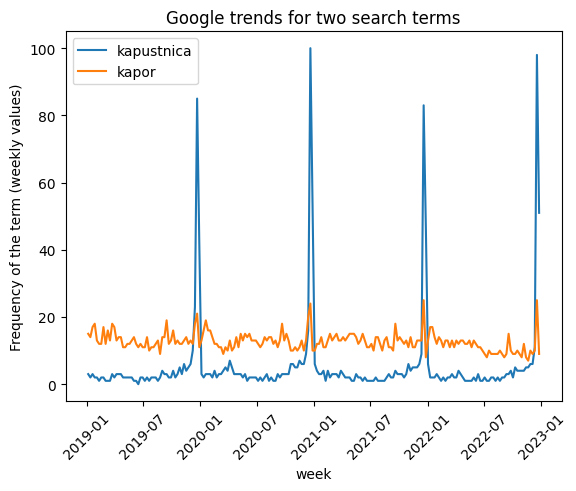

In [89]:
axes = sns.lineplot(trends1, dashes=False)
axes.set_ylabel("Frequency of the term (weekly values)")
axes.set_title("Google trends for two search terms")
# rotate tick labels
axes.tick_params(axis='x', labelrotation = 45)
pass

* With kapustnica we see a clear seasonal trend.
* But kapor behaves differently. As related search terms Google reports zbgis kataster, zbgis mapa, zgbis, katasterportal list vlastnictva, dážďovka. Can you explain this?


### Smoothing data

* Time series above is measured weekly as is quite noisy.
* We can smooth the data e.g. by **aggregating** them in longer time intervals. Here we compute mean value in each month (4 or 5 weeks).
* This is done using [`resample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) method form pandas.
* An alternative is to use a **moving window**, where we choose a window size. e.g. 4 weeks and compute a new series, each value being mean or other summary of 4 consecutive windows in the input.
* For example with values 2,6,4,2,8,2 and window size 4, we get window means 3.5, 5, 4.


In [90]:
# aggregate google trends from weekly to monthly mean
trends1monthly = trends1.resample('M').mean()
display(Markdown("**New table of monthly means** (the first 5 rows)"))
display(trends1monthly.head())
display(Markdown("**The number of values aggregated in each month** (the first 5 values)"))
display(trends1.resample('M').size().head())

**New table of monthly means** (the first 5 rows)

,kapustnica,kapor
week,,
2019-01-31,2.50,16.0
2019-02-28,1.75,13.5
2019-03-31,1.60,15.2
2019-04-30,2.75,13.0
2019-05-31,2.00,12.0


**The number of values aggregated in each month** (the first 5 values)

week
2019-01-31    4
2019-02-28    4
2019-03-31    5
2019-04-30    4
2019-05-31    4
Freq: M, dtype: int64

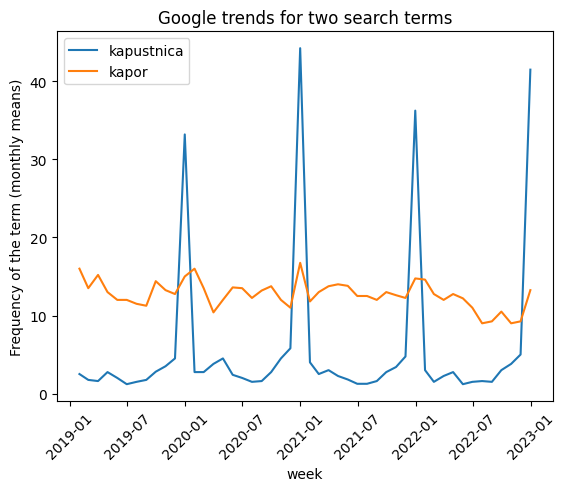

In [91]:
axes = sns.lineplot(trends1monthly, dashes=False)
axes.set_ylabel("Frequency of the term (monthly means)")
axes.set_title("Google trends for two search terms")
axes.tick_params(axis='x', labelrotation = 45)
pass

### Trend: temperatures are growing in spring

* We will also look at a dataset displaying a trend: series of temperature values from Piešťany form January to June 2010, downloaded from [US National Oceanic and Atmospheric Administration](https://www.ncdc.noaa.gov/cdo-web/).
* We show both the original data and smoothed values with rolling average.

In [92]:
# read a dataset of temperatures in Piestany
url="https://bbrejova.github.io/viz/data/piestany-weather.csv"
weather = pd.read_csv(url, parse_dates=['DATE']).set_index('DATE')
# select only columns with daily maximum temperatures
temperature = weather["TMAX"]
# select only period from January to June 2010
spring2010 = temperature[pd.Timestamp('2010-01-01'):pd.Timestamp('2010-06-30')]
display(spring2010)

DATE
2010-01-01     7.8
2010-01-02     1.8
2010-01-03    -1.1
2010-01-04    -1.4
2010-01-05    -1.1
              ... 
2010-06-26     NaN
2010-06-27    25.0
2010-06-28    27.8
2010-06-29    28.2
2010-06-30    29.5
Name: TMAX, Length: 181, dtype: float64

In [93]:
# compute rolling averages in a window of 5 and 30 days
spring2010rolling5 = spring2010.rolling(5, min_periods=2).mean()
spring2010rolling30 = spring2010.rolling(30, min_periods=10).mean()
spring2010rolling5.head(10)

DATE
2010-01-01         NaN
2010-01-02    4.800000
2010-01-03    2.833333
2010-01-04    1.775000
2010-01-05    1.200000
2010-01-06   -0.200000
2010-01-07   -0.460000
2010-01-08   -0.300000
2010-01-09    1.125000
2010-01-10    1.866667
Name: TMAX, dtype: float64

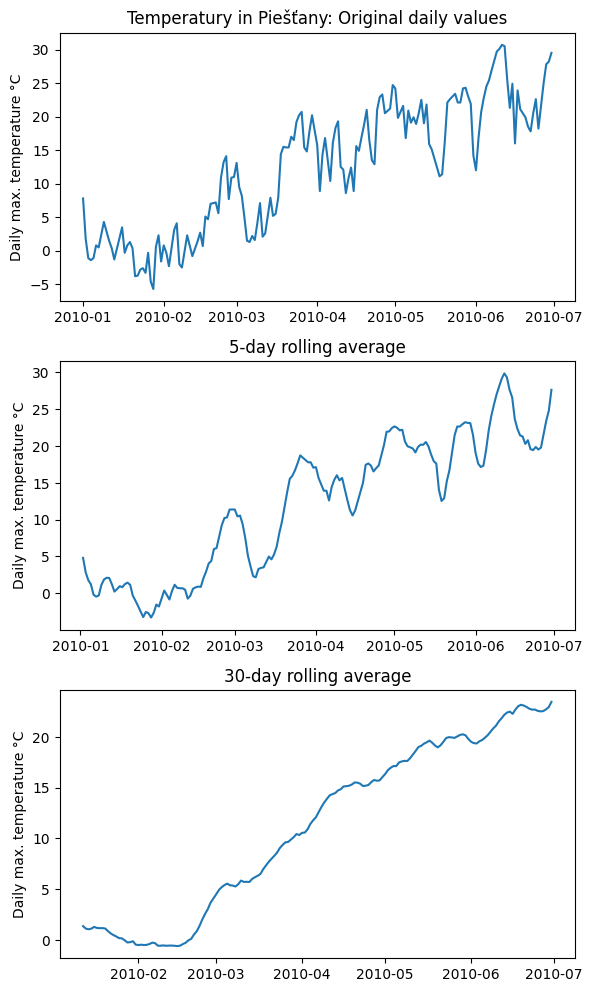

In [94]:
(figure, axes) = plt.subplots(3, 1, figsize=(6, 10))
sns.lineplot(spring2010, ax=axes[0])
sns.lineplot(spring2010rolling5, ax=axes[1])
sns.lineplot(spring2010rolling30, ax=axes[2])
axes[0].set_title("Temperatury in Piešťany: Original daily values")
axes[1].set_title("5-day rolling average")
axes[2].set_title("30-day rolling average")
for i in range(3):
  axes[i].set_ylabel("Daily max. temperature °C")
  axes[i].set_xlabel(None)
figure.tight_layout(pad=1.0)
pass

### Overlapping timescales to display seasonality

* We can better see cyclical trends if we plot each cycle on the same x-axis scale.
* In our Google example, we will use the month as the x axis and plot individual years as lines.

In [95]:
# convert montly table to long format whit sepearte rows for kapustnica and kapor
trends1monthlyLong = trends1monthly.reset_index().melt(id_vars=['week'])
trends1monthlyLong.rename(columns={'variable':'term', 'value':'frequency'}, inplace=True)
# create separate columns with year and month
trends1monthlyLong['month'] = trends1monthlyLong['week'].dt.month
trends1monthlyLong['year'] = trends1monthlyLong['week'].dt.year
display(Markdown("**Monthly table in the long format**"))
display(trends1monthlyLong)


**Monthly table in the long format**

,week,term,frequency,month,year
0,2019-01-31,kapustnica,2.50,1,2019
1,2019-02-28,kapustnica,1.75,2,2019
2,2019-03-31,kapustnica,1.60,3,2019
3,2019-04-30,kapustnica,2.75,4,2019
4,2019-05-31,kapustnica,2.00,5,2019
...,...,...,...,...,...
91,2022-08-31,kapor,9.25,8,2022
92,2022-09-30,kapor,10.50,9,2022
93,2022-10-31,kapor,9.00,10,2022
94,2022-11-30,kapor,9.25,11,2022


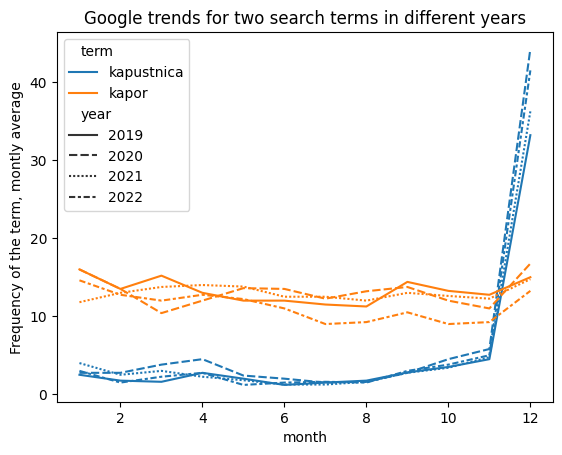

In [96]:
# use month as x, separate years by line style and search terms by color
axes = sns.lineplot(trends1monthlyLong, x='month', y='frequency', hue='term', style='year')
axes.set_title("Google trends for two search terms in different years")
axes.set_ylabel("Frequency of the term, montly average")
pass

* We can see that across years the trend is quite stable.
* Below we see another version of the figure where multiple lines for years are replaced with mean and its confidence interval expressing our uncertainty in the true value fo the mean due to noise in data.

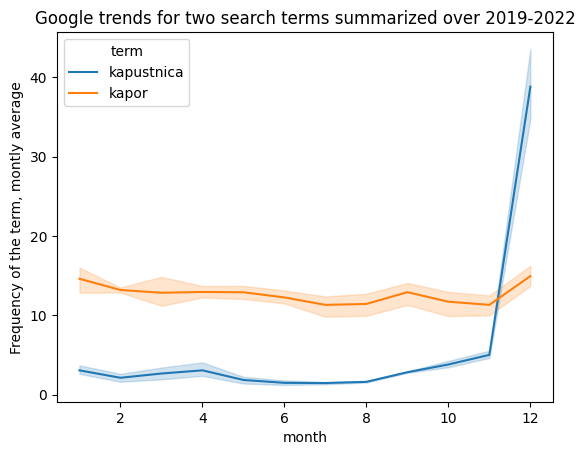

In [97]:
axes = sns.lineplot(trends1monthlyLong, x='month', y='frequency', hue='term')
axes.set_title("Google trends for two search terms summarized over 2019-2022")
axes.set_ylabel("Frequency of the term, montly average")
pass

### Importance of scales
* The plot below shows that if we do not start y axis at 0, differences in kapor searches may appear exaggerated.
* The next two plots show that even with y axis starting at 0, the time series may appear more variable with narrower aspect ratio of the figure.

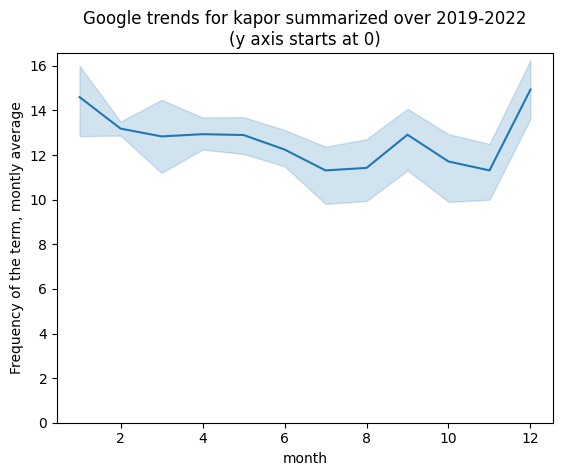

In [98]:
kapor = trends1monthlyLong.query("term=='kapor'")
axes = sns.lineplot(kapor, x='month', y='frequency')
axes.set_title("Google trends for kapor summarized over 2019-2022\n(y axis starts at 0)")
axes.set_ylabel("Frequency of the term, montly average")
axes.set_ylim(ymin=0)
pass

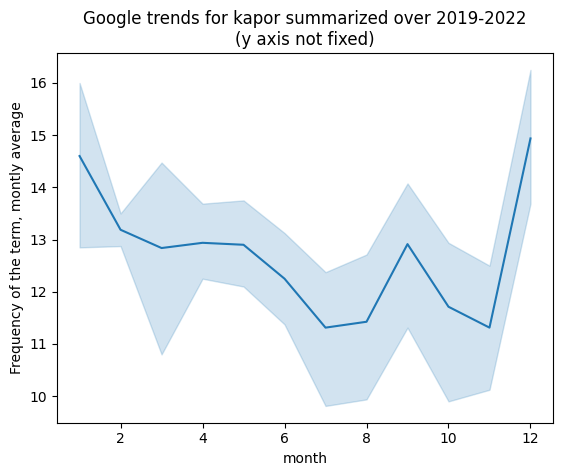

In [99]:
axes = sns.lineplot(kapor, x='month', y='frequency')
axes.set_title("Google trends for kapor summarized over 2019-2022\n(y axis not fixed)")
axes.set_ylabel("Frequency of the term, montly average")
pass

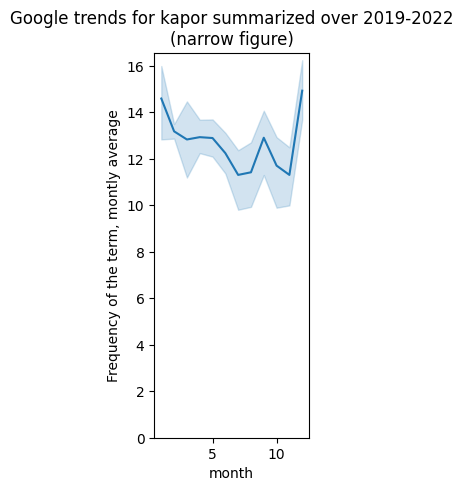

In [100]:
(figure, axes) = plt.subplots(figsize=(2,5))
sns.lineplot(kapor, x='month', y='frequency', ax=axes)
axes.set_title("Google trends for kapor summarized over 2019-2022\n(narrow figure)")
axes.set_ylabel("Frequency of the term, montly average")
axes.set_ylim(ymin=0)
pass

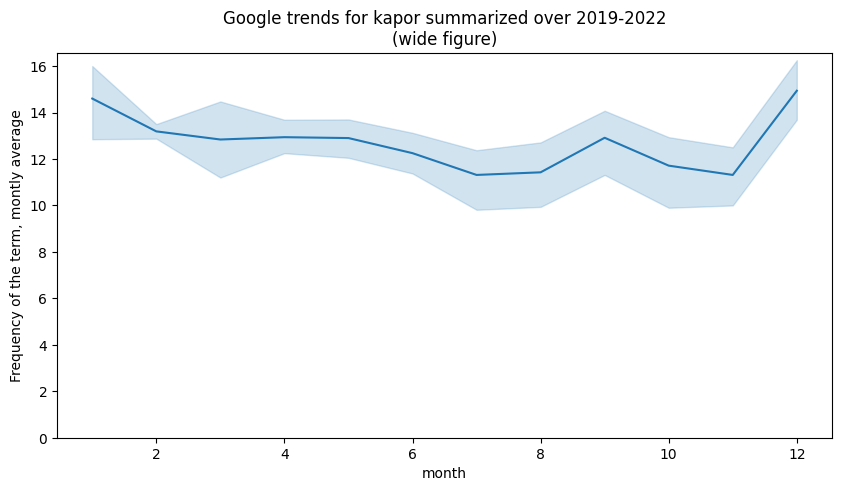

In [101]:
(figure, axes) = plt.subplots(figsize=(10,5))
sns.lineplot(kapor, x='month', y='frequency', ax=axes)
axes.set_title("Google trends for kapor summarized over 2019-2022\n(wide figure)")
axes.set_ylabel("Frequency of the term, montly average")
axes.set_ylim(ymin=0)
pass

### Relative scales

* When we care about rate of increase of decrease, it might be better to express values as percentage compared to intial value.
* Here we compare values in each month with values on Januray of the same year.
* In this way even two time series with quite different values can be plotted in the same plot (e.g. revenue of a small and a large company and their relative changes within a year)

In [102]:
# compute relative values by transforming each group of montly values 
# by dividing them by the first value (January)
relValue = (trends1monthlyLong.groupby(['year','term'], group_keys=False)
  .apply(lambda x : x['frequency'] * 100 / x.iloc[0]['frequency'])
)
# add relative values as a column to the long table
relTable = trends1monthlyLong.assign(relValue=relValue)
display(Markdown("**Relative values added**"))
relTable.head()

**Relative values added**

,week,term,frequency,month,year,relValue
0,2019-01-31,kapustnica,2.50,1,2019,100.0
1,2019-02-28,kapustnica,1.75,2,2019,70.0
2,2019-03-31,kapustnica,1.60,3,2019,64.0
3,2019-04-30,kapustnica,2.75,4,2019,110.0
4,2019-05-31,kapustnica,2.00,5,2019,80.0


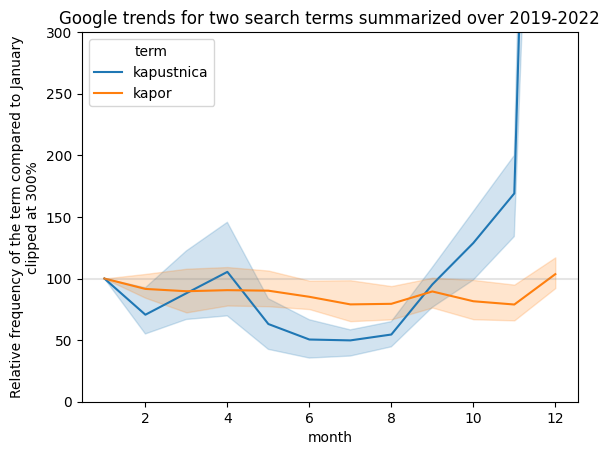

In [103]:
axes = sns.lineplot(relTable, x='month', y='relValue', hue='term')
axes.set_ylim(ymin=0, ymax=300)
axes.axhline(100, color="gray", alpha=0.2)
axes.set_title("Google trends for two search terms summarized over 2019-2022")
axes.set_ylabel("Relative frequency of the term compared to January\nclipped at 300%")

pass

### One more pair of Google trend lines

* Again very seasonal: lyže and vlek.
* This time we have monthly data over a longer period of time.
* We display the original data as well as yearly seasonal trend.
* The peak month is January for both queries, so we also display January values changing over the years.

In [104]:
url = "https://bbrejova.github.io/viz/data/lyze-vlek.csv"
trends2 = pd.read_csv(url, parse_dates=['month']).set_index('month')
display(trends2.head())

,lyže,vlek
month,,
2007-01-01,28,6
2007-02-01,48,10
2007-03-01,0,3
2007-04-01,5,0
2007-05-01,0,0


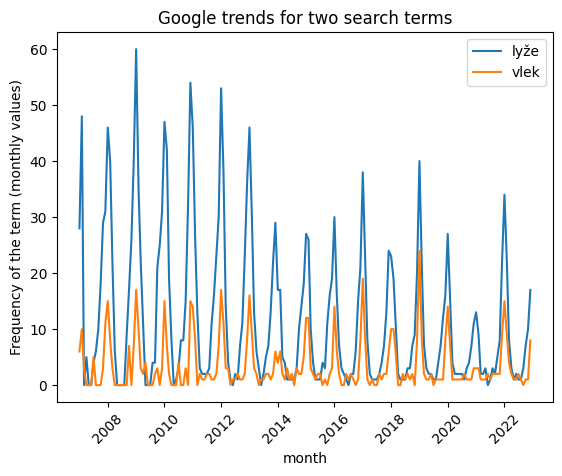

In [105]:
axes = sns.lineplot(trends2, dashes=False)
axes.set_title("Google trends for two search terms")
axes.set_ylabel("Frequency of the term (monthly values)")
# rotate tick labels
axes.tick_params(axis='x', labelrotation = 45)
pass

In [106]:
trends2long = trends2.reset_index().melt(id_vars=['month'])
trends2long.rename(columns={'month':'date','variable':'term', 'value':'frequency'}, inplace=True)
trends2long['month'] = trends2long['date'].dt.month
trends2long['year'] = trends2long['date'].dt.year
display(trends2long)

,date,term,frequency,month,year
0,2007-01-01,lyže,28,1,2007
1,2007-02-01,lyže,48,2,2007
2,2007-03-01,lyže,0,3,2007
3,2007-04-01,lyže,5,4,2007
4,2007-05-01,lyže,0,5,2007
...,...,...,...,...,...
379,2022-08-01,vlek,1,8,2022
380,2022-09-01,vlek,0,9,2022
381,2022-10-01,vlek,1,10,2022
382,2022-11-01,vlek,1,11,2022


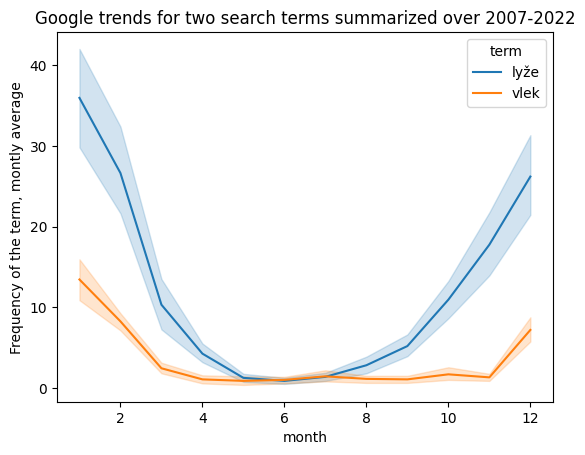

In [107]:
axes = sns.lineplot(trends2long, x='month', y='frequency', hue='term')
axes.set_title("Google trends for two search terms summarized over 2007-2022")
axes.set_ylabel("Frequency of the term, montly average")
pass

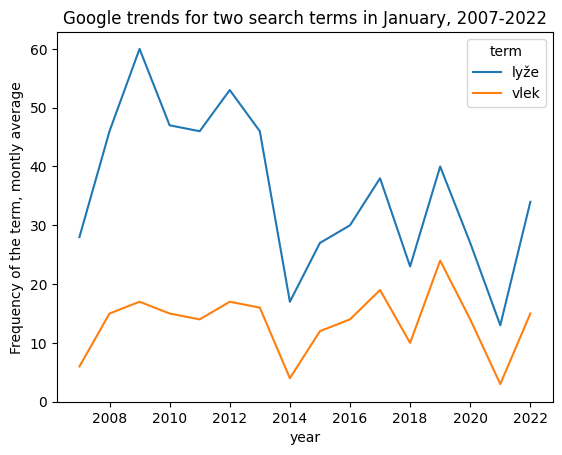

In [108]:
lyzeJan = trends2long.query("month==1")
axes = sns.lineplot(lyzeJan, x='year', y='frequency', hue='term')
axes.set_ylim(ymin=0)
axes.set_title("Google trends for two search terms in January, 2007-2022")
axes.set_ylabel("Frequency of the term, montly average")

pass

The drop in 2021 was due to pandemics, but what about 2014 and 2018?

### Acknowledging missing values

* Let us imagine that January values fo 2010 and 2011 are missing.
* If we draw a lineplot in Seaborn, years 2009 and 2012 are connected by a stright line and viewer does not know that something is missing.
* This is not a good idea.
* Below we use pointplot which nicely shows the missing data and also locations of measured values.


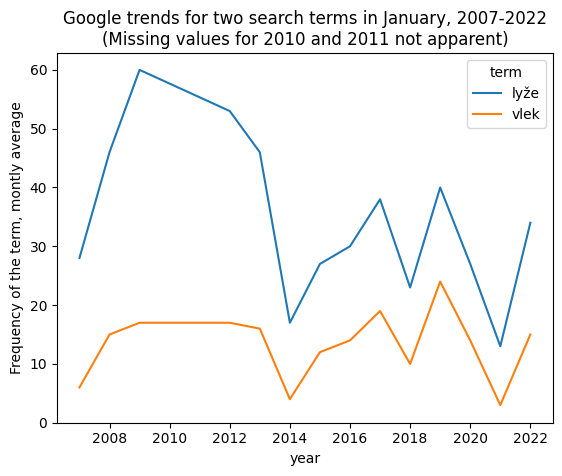

In [109]:
# remove values for two years
to_remove = lyzeJan["year"].isin([2010,2011])
lyzeJanMissing = lyzeJan.copy(deep=True)
lyzeJanMissing.loc[to_remove, 'frequency'] = np.nan
axes = sns.lineplot(lyzeJanMissing, x='year', y='frequency', hue='term')
axes.set_ylim(ymin=0)
axes.set_title("Google trends for two search terms in January, 2007-2022\n(Missing values for 2010 and 2011 not apparent)")
axes.set_ylabel("Frequency of the term, montly average")
pass

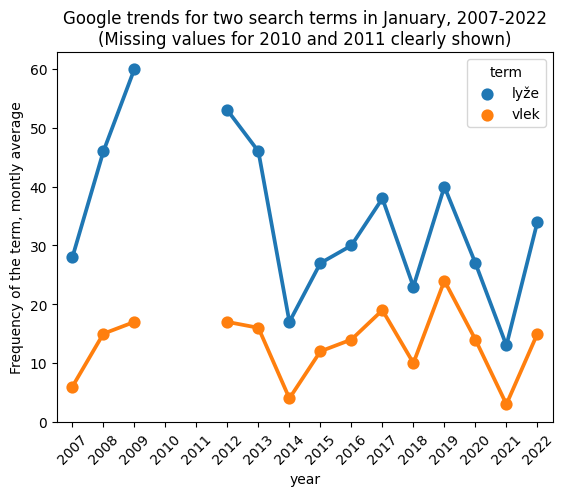

In [110]:
axes = sns.pointplot(lyzeJanMissing, x='year', y='frequency', hue='term')
axes.set_ylim(ymin=0)
axes.set_title("Google trends for two search terms in January, 2007-2022\n(Missing values for 2010 and 2011 clearly shown)")
axes.set_ylabel("Frequency of the term, montly average")
axes.tick_params(axis='x', labelrotation = 45)
pass